In [ ]:
import numpy as np 
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('BevZTestHistory.csv')

In [ ]:
data.shape

(1386, 8)

In [ ]:
data.head()

,Date,Store_Name,Region,Units_Sold,Average Retail Price,Sales_Rep,Endcap,Demo
0,8/10/20,Academy,Rocky Mountains,271.0,$4.29,1,0,0
1,8/17/20,Academy,Rocky Mountains,315.0,$4.29,1,0,1
2,8/24/20,Academy,Rocky Mountains,391.0,$4.09,1,0,0
3,8/31/20,Academy,Rocky Mountains,250.0,$4.09,1,0,0
4,9/7/20,Academy,Rocky Mountains,222.0,$4.79,1,0,0


In [ ]:
data.describe()

,Units_Sold,Sales_Rep,Endcap,Demo
count,1381.00000,1386.000000,1386.000000,1386.000000
mean,257.05441,0.549784,0.038240,0.058442
std,242.86067,0.497695,0.191843,0.234661
min,1.88000,0.000000,0.000000,0.000000
25%,188.00000,0.000000,0.000000,0.000000
50%,236.00000,1.000000,0.000000,0.000000
75%,295.00000,1.000000,0.000000,0.000000
max,8100.00000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1386 non-null   object 
 1   Store_Name            1386 non-null   object 
 2   Region                1386 non-null   object 
 3   Units_Sold            1381 non-null   float64
 4   Average Retail Price  1386 non-null   object 
 5   Sales_Rep             1386 non-null   int64  
 6   Endcap                1386 non-null   int64  
 7   Demo                  1386 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 86.8+ KB


In [ ]:
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data['Demo_lag_1'] = data.sort_values('Date').groupby('Store_Name')['Demo'].shift(1)
data['Demo_lag_2'] = data.sort_values('Date').groupby('Store_Name')['Demo'].shift(2)
data['Demo_lag_3'] = data.sort_values('Date').groupby('Store_Name')['Demo'].shift(3)
data['Demo_lag_4'] = data.sort_values('Date').groupby('Store_Name')['Demo'].shift(4)
data['Demo_lag_5'] = data.sort_values('Date').groupby('Store_Name')['Demo'].shift(5)

In [ ]:
data=data.fillna(0)

In [ ]:
data['Demo_lag_sum'] = data['Demo_lag_1']+data['Demo_lag_2']+data['Demo_lag_3']+data['Demo_lag_4']+data['Demo_lag_5']

In [ ]:
data.loc[data['Demo_lag_sum']!=0,"Demo_lag"] = 1
data.loc[data['Demo_lag_sum']==0,"Demo_lag"] = 0

In [ ]:
data.head()

,Date,Store_Name,Region,Units_Sold,Average Retail Price,Sales_Rep,Endcap,Demo,Demo_lag_1,Demo_lag_2,Demo_lag_3,Demo_lag_4,Demo_lag_5,Demo_lag_sum,Demo_lag
0,2020-08-10,Academy,Rocky Mountains,271.0,$4.29,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-17,Academy,Rocky Mountains,315.0,$4.29,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-24,Academy,Rocky Mountains,391.0,$4.09,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2020-08-31,Academy,Rocky Mountains,250.0,$4.09,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,2020-09-07,Academy,Rocky Mountains,222.0,$4.79,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
data["Units_Sold"].quantile([.0, 0.01, 0.25, .5, 0.75, 0.99, 1])

0.00       0.000
0.01       7.981
0.25     187.250
0.50     235.000
0.75     295.000
0.99     752.150
1.00    8100.000
Name: Units_Sold, dtype: float64

In [ ]:
data.head()

,Date,Store_Name,Region,Units_Sold,Average Retail Price,Sales_Rep,Endcap,Demo,Demo_lag_1,Demo_lag_2,Demo_lag_3,Demo_lag_4,Demo_lag_5,Demo_lag_sum,Demo_lag
0,2020-08-10,Academy,Rocky Mountains,271.0,$4.29,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-17,Academy,Rocky Mountains,315.0,$4.29,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-24,Academy,Rocky Mountains,391.0,$4.09,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2020-08-31,Academy,Rocky Mountains,250.0,$4.09,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,2020-09-07,Academy,Rocky Mountains,222.0,$4.79,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
data_1=data[(data['Units_Sold']<=1000) & (data['Units_Sold']>=50) ]
data_1.shape

(1366, 15)

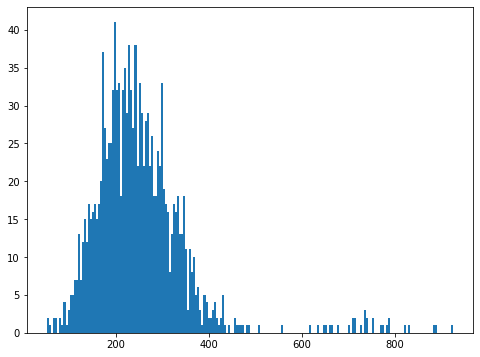

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data_1['Units_Sold'].values, bins=200)
plt.show()

In [ ]:
#tranform the datatype of price
data_1['Average Retail Price'] = data_1['Average Retail Price'].apply(lambda x: x.replace('$','')).astype(np.float64)

In [ ]:
#drop missing value
data_2=data_1.dropna()

In [ ]:
#delete the 'Date'and 'Storename'
data_3=data_2.drop(['Date','Store_Name','Demo_lag_1','Demo_lag_2','Demo_lag_3','Demo_lag_4','Demo_lag_5','Demo_lag_sum'],axis=1)
data_3.head()

,Region,Units_Sold,Average Retail Price,Sales_Rep,Endcap,Demo,Demo_lag
0,Rocky Mountains,271.0,4.29,1,0,0,0.0
1,Rocky Mountains,315.0,4.29,1,0,1,0.0
2,Rocky Mountains,391.0,4.09,1,0,0,1.0
3,Rocky Mountains,250.0,4.09,1,0,0,1.0
4,Rocky Mountains,222.0,4.79,1,0,0,1.0


In [ ]:
len(data_3)

1366

In [ ]:
#one hot encoding
onehot= pd.get_dummies(data_3['Region'])
data_encoded = pd.concat([data_3, onehot], axis=1)

In [ ]:
data_4=data_encoded.drop('Region',axis=1)
data_4.head()

,Units_Sold,Average Retail Price,Sales_Rep,Endcap,Demo,Demo_lag,Florida,Mid Atlantic,Midwest,North Atlantic,Northeast,Northern California,Pacific Northwest,Rocky Mountains,South,South Pacific,Southwest
0,271.0,4.29,1,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0
1,315.0,4.29,1,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0
2,391.0,4.09,1,0,0,1.0,0,0,0,0,0,0,0,1,0,0,0
3,250.0,4.09,1,0,0,1.0,0,0,0,0,0,0,0,1,0,0,0
4,222.0,4.79,1,0,0,1.0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
datapoints = data_4.drop('Units_Sold', axis=1)
target = np.array(data_4['Units_Sold'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datapoints, target, test_size=0.2, random_state=42)

In [ ]:
###---start fitting your models---###
import statsmodels.api as sm
lm_1 = sm.OLS(y_train,X_train)
results = lm_1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     133.7
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          3.08e-233
Time:                        11:41:29   Log-Likelihood:                -6059.7
No. Observations:                1092   AIC:                         1.215e+04
Df Residuals:                    1076   BIC:                         1.223e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Average Retail Price   -30.1087 

In [ ]:
from sklearn.metrics import mean_squared_error
def overall_score(model):
    pred_train = model.predict(X_train)
    rmse1 = np.sqrt(mean_squared_error(y_train,pred_train))
    print('Train rmse: {}'.format(rmse1))
    pred_test = model.predict(X_test)
    rmse2 = np.sqrt(mean_squared_error(y_test,pred_test))
    print('Test rmse: {}'.format(rmse2))
    

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
overall_score(lr)

Train rmse: 62.19529667596449
Test rmse: 69.02701324812905


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1).fit(X_train,y_train)
overall_score(ridge)

Train rmse: 62.22085436415159
Test rmse: 68.90172639444931


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train,y_train)
overall_score(lasso)

Train rmse: 62.19651912276092
Test rmse: 69.02136271038623


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train,y_train)
overall_score(xgb)

Train rmse: 36.39050876484447
Test rmse: 64.40529317148739


In [ ]:
n_estimators = [100,200,300,400,500]
max_depth = [3,4, 5, 6,7,8,9,10]
min_child_weight = [1, 2, 3,4,5]
gamma = [0,0.1, 0.2, 0.3,0.4,0.5]
subsample = [0.5,0.6, 0.7, 0.8,0.9,1]
colsample_bytree = [0.5,0.6, 0.7, 0.8, 0.9,1]
reg_alpha = [0.05, 0.1, 1]
reg_lambda = [0.05, 0.1, 1]
learning_rate = [0.01, 0.05, 0.1, 0.2]

In [ ]:
param_grid = dict(learning_rate = learning_rate)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
grid_search = GridSearchCV(xgb,param_grid,scoring = 'neg_mean_squared_error')
grid_result = grid_search.fit(X_train,y_train)

In [ ]:
grid_result.best_params_

{'learning_rate': 0.05}

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,min_child_weight =4,max_depth =3,gamma =0.2,colsample_bytree =0.5,reg_alpha = 0.05,learning_rate =0.05)
xgb.fit(X_train,y_train)
overall_score(xgb)

Train rmse: 49.71321728045229
Test rmse: 57.88668515015057


In [ ]:
n_estimators_range=[int(x) for x in np.linspace(start=50,stop=1000,num=20)]
max_features_range=['auto','sqrt']
max_depth_range=[int(x) for x in np.linspace(start=1,stop=50,num=25)]
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]
bootstrap_range=[True,False]

In [ ]:
random_forest_hp_range={'n_estimators':n_estimators_range,
                        'max_features':max_features_range,
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range,
                        'min_samples_leaf':min_samples_leaf_range
                        }
print(random_forest_hp_range)


{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_model_test_base=RandomForestRegressor()
random_forest_model_test_random=RandomizedSearchCV(estimator=random_forest_model_test_base,
                                                   param_distributions=random_forest_hp_range,
                                                   n_iter=200,
                                                   n_jobs=-1,
                                                   cv=3,
                                                   verbose=1,
                                                   random_state=42
                                                   )
random_forest_model_test_random.fit(X_train,y_train)

best_hp_now=random_forest_model_test_random.best_params_
print(best_hp_now)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=200,max_depth=7,min_samples_split=10,min_samples_leaf=1,random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [ ]:
y_pred = regr.predict(X_test)
rmse = sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

57.52436573525199

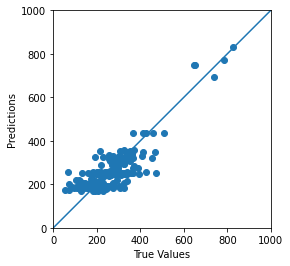

In [ ]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,1000]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)

In [ ]:
##----predict----###
predict_data = pd.read_csv('Rollout_new.csv').drop('Unnamed: 0',axis =1)

In [ ]:
predict_data.head()

,,store_name,address,city,state,Region,Date,Average Retail Price,Sales Rep,Endcap,Demo,alter_address
0,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-04,$3.50,1,0,0,"Belt Line Rd, Addison TX"
1,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-11,$3.50,1,1,0,"Belt Line Rd, Addison TX"
2,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-18,$3.50,1,1,1,"Belt Line Rd, Addison TX"
3,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-25,$3.50,1,1,0,"Belt Line Rd, Addison TX"
4,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-02-01,$3.50,1,1,1,"Belt Line Rd, Addison TX"


In [ ]:
predict_data['Date'] = pd.to_datetime(predict_data.Date)

In [ ]:
address=predict_data['address'].str.split(' ',expand=True)
predict_data['alter_address']=address.iloc[:,1]+' '+address.iloc[:,2]+' '+predict_data.city+' '+predict_data.state

In [ ]:
predict_data['Demo_lag_1'] = predict_data.sort_values('Date').groupby('address')['Demo'].shift(1)
predict_data['Demo_lag_2'] = predict_data.sort_values('Date').groupby('address')['Demo'].shift(2)
predict_data['Demo_lag_3'] = predict_data.sort_values('Date').groupby('address')['Demo'].shift(3)
predict_data['Demo_lag_4'] = predict_data.sort_values('Date').groupby('address')['Demo'].shift(4)
predict_data['Demo_lag_5'] = predict_data.sort_values('Date').groupby('address')['Demo'].shift(5)

In [ ]:
predict_data=predict_data.fillna(0)

In [ ]:
predict_data['Demo_lag_sum'] = predict_data['Demo_lag_1']+predict_data['Demo_lag_2']+predict_data['Demo_lag_3']+predict_data['Demo_lag_4']+predict_data['Demo_lag_5']

In [ ]:
predict_data.loc[predict_data['Demo_lag_sum']!=0,"Demo_lag"] = 1
predict_data.loc[predict_data['Demo_lag_sum']==0,"Demo_lag"] = 0

In [ ]:
predict_data.head()

,,store_name,address,city,state,Region,Date,Average Retail Price,Sales Rep,Endcap,Demo,alter_address,Demo_lag_1,Demo_lag_2,Demo_lag_3,Demo_lag_4,Demo_lag_5,Demo_lag_sum,Demo_lag
0,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-04,$3.50,1,0,0,Belt Line Addison TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-11,$3.50,1,1,0,Belt Line Addison TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-18,$3.50,1,1,1,Belt Line Addison TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-01-25,$3.50,1,1,0,Belt Line Addison TX,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Sandy,Whole Foods Market,"5100 Belt Line Rd, Ste 1012",Addison,TX,Southwest,2021-02-01,$3.50,1,1,1,Belt Line Addison TX,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
sandy = predict_data[predict_data[' '] == 'Sandy']
tony = predict_data[predict_data[' '] == 'Tony']
predict_tony = tony.drop([' ','store_name','address','city','state','Date','alter_address','Demo_lag_1','Demo_lag_2','Demo_lag_3','Demo_lag_4','Demo_lag_5','Demo_lag_sum'],axis=1)
predict_sandy = sandy.drop([' ','store_name','address','city','state','Date','alter_address','Demo_lag_1','Demo_lag_2','Demo_lag_3','Demo_lag_4','Demo_lag_5','Demo_lag_sum'],axis=1)

In [ ]:
predict_tony.head()

,Region,Average Retail Price,Sales Rep,Endcap,Demo,Demo_lag
2004,Rocky Mountains,$ 3.25,1,0,0,0.0
2005,Rocky Mountains,$ 3.00,1,0,0,0.0
2006,Rocky Mountains,$ 3.50,1,1,1,0.0
2007,Rocky Mountains,$ 3.50,1,1,0,1.0
2008,Rocky Mountains,$ 3.50,1,0,1,1.0


In [ ]:
predict_tony[' Average Retail Price '] = predict_tony[' Average Retail Price '].apply(lambda x: x.replace('$','').strip()).astype(np.float64)
predict_sandy[' Average Retail Price '] = predict_sandy[' Average Retail Price '].apply(lambda x: x.replace('$','').strip()).astype(np.float64)

In [ ]:
predict_tony.head()

,Region,Average Retail Price,Sales Rep,Endcap,Demo,Demo_lag
2004,Rocky Mountains,3.25,1,0,0,0.0
2005,Rocky Mountains,3.00,1,0,0,0.0
2006,Rocky Mountains,3.50,1,1,1,0.0
2007,Rocky Mountains,3.50,1,1,0,1.0
2008,Rocky Mountains,3.50,1,0,1,1.0


In [ ]:
onehot_tony= pd.get_dummies(predict_tony['Region'])
onehot_sandy= pd.get_dummies(predict_sandy['Region'])
predict_encoded_sandy = pd.concat([predict_sandy, onehot_sandy], axis=1).drop('Region',axis=1)
predict_encoded_tony = pd.concat([predict_tony, onehot_tony], axis=1).drop('Region',axis=1)

In [ ]:
predict_encoded_tony.head()

,Average Retail Price,Sales Rep,Endcap,Demo,Demo_lag,Florida,Mid Atlantic,Midwest,North Atlantic,Northeast,Northern California,Pacific Northwest,Rocky Mountains,South,South Pacific,Southwest
2004,3.25,1,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0
2005,3.00,1,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0
2006,3.50,1,1,1,0.0,0,0,0,0,0,0,0,1,0,0,0
2007,3.50,1,1,0,1.0,0,0,0,0,0,0,0,1,0,0,0
2008,3.50,1,0,1,1.0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
predict_tony = predict_encoded_tony.values
predict_sandy = predict_encoded_sandy.values

In [ ]:
sandy_prediction = regr.predict(predict_sandy).round()
tony_prediction = regr.predict(predict_tony).round()

In [ ]:
analyse_tony = tony[[' Average Retail Price ','address','Demo','Sales Rep','Endcap']]
analyse_sandy = sandy[[' Average Retail Price ','address','Demo','Sales Rep','Endcap']]
analyse_tony[' Average Retail Price '] = analyse_tony[' Average Retail Price '].apply(lambda x: x.replace('$','').strip()).astype(np.float64)
analyse_sandy[' Average Retail Price '] = analyse_sandy[' Average Retail Price '].apply(lambda x: x.replace('$','').strip()).astype(np.float64)
analyse_tony['pred_unit_sold'] = tony_prediction
analyse_sandy['pred_unit_sold'] = sandy_prediction

In [ ]:
def cal_revenue(x):
    revenue = x[' Average Retail Price ']*x['pred_unit_sold']
    return revenue
def cal_cost(x):
    cost = 0
    if x['Sales Rep'] == 1:
        cost+=160
    if x['Endcap'] == 1:
        cost+=200
    if x['Demo'] == 1:
        cost+=150
    return cost
def cal_profit(x):
    revenue = cal_revenue(x)
    cost = cal_cost(x)
    profit = revenue-cost
    return  profit

In [ ]:
analyse_tony['revenue'] = analyse_tony.apply(cal_revenue,axis =1)
analyse_tony['cost'] = analyse_tony.apply(cal_cost,axis =1)
analyse_tony['profit'] = analyse_tony.apply(cal_profit,axis =1)
analyse_sandy['revenue'] = analyse_sandy.apply(cal_revenue,axis =1)
analyse_sandy['cost'] = analyse_sandy.apply(cal_cost,axis =1)
analyse_sandy['profit'] = analyse_sandy.apply(cal_profit,axis =1)

In [ ]:
(analyse_tony.groupby('address').sum()/12)

,Average Retail Price,Demo,Sales Rep,Endcap,pred_unit_sold,revenue,cost,profit
address,,,,,,,,
100 S Green Valley Pkwy,3.354167,0.250000,1.0,0.500000,555.250000,1895.541667,297.500000,1598.041667
100 Sunset Dr,3.479167,0.416667,1.0,0.333333,508.500000,1772.375000,289.166667,1483.208333
100 W 125th St,3.312500,0.250000,1.0,0.333333,469.083333,1585.208333,264.166667,1321.041667
1001 Broadway,3.416667,0.250000,1.0,0.500000,580.333333,2001.666667,297.500000,1704.166667
1001 Plymouth Rd,3.395833,0.250000,1.0,0.500000,550.666667,1889.770833,297.500000,1592.270833
...,...,...,...,...,...,...,...,...
95 East Houston St,3.354167,0.333333,0.0,0.000000,271.750000,917.729167,50.000000,867.729167
951 Bank St,3.312500,0.083333,0.0,0.333333,249.916667,831.354167,79.166667,752.187500
967 Florida Avenue NW,3.375000,0.166667,0.0,0.416667,261.250000,880.750000,108.333333,772.416667


In [ ]:
(analyse_sandy.groupby('address').sum()/12)

,Average Retail Price,Demo,Sales Rep,Endcap,pred_unit_sold,revenue,cost,profit
address,,,,,,,,
1 N Halsted St,3.666667,0.416667,0.0,0.333333,273.333333,999.375000,129.166667,870.208333
1001 Broadway,3.750000,0.333333,1.0,0.833333,712.583333,2668.791667,376.666667,2292.125000
10020 Regency Cir,3.666667,0.333333,1.0,0.333333,486.833333,1796.104167,276.666667,1519.437500
1025 Gilman St,3.604167,0.166667,1.0,0.750000,631.416667,2277.291667,335.000000,1942.291667
1026 NE 64th St,3.583333,0.250000,0.0,0.750000,254.666667,912.979167,187.500000,725.479167
...,...,...,...,...,...,...,...,...
929 South St,3.625000,0.250000,0.0,0.500000,262.000000,948.916667,137.500000,811.416667
9366 S Colorado Blvd,3.583333,0.250000,1.0,0.500000,552.916667,1981.354167,297.500000,1683.854167
94 Derby St,3.625000,0.416667,1.0,0.750000,671.166667,2425.770833,372.500000,2053.270833
